In [219]:
import numpy as np
import mne
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [201]:
def load_EEG(filepath, label):
    if label == 'preictal':
        data = np.load(filepath)
        target = np.ones(data.shape[1])
    if label == 'ictal':
        data = np.load(filepath)
        target = -1
    return data, target

In [232]:
rootdir = f'{os.getcwd()}/data/'
cases = ['chb01', 'chb02', 'chb03']
seconds = ['10s']
preictal_data = []
ictal_data = []

for i in range(len(cases)):
    
    temp_ictal = []
    temp_preictal = []
    
    temp_ictal = os.listdir(rootdir+cases[i]+'/ictal/')
    temp_preictal = os.listdir(rootdir+cases[i]+'/preictal_10s/')
    
    if '.DS_Store' in temp_ictal: temp_ictal.remove('.DS_Store')
    if '.DS_Store' in temp_preictal: temp_preictal.remove('.DS_Store')
    
    
    for j in range(len(temp_ictal)):
        #load preictal data
        pi_filepath = rootdir+cases[i]+'/preictal_10s/'+temp_preictal[j]
        pi_data, pi_target = load_EEG(pi_filepath, 'preictal')
        
        #load ictal data
        ic_filepath = rootdir+cases[i]+'/ictal/'+temp_ictal[j]
        ic_data, ic_target = load_EEG(ic_filepath, 'ictal')
        
        #store data in list
        preictal_data.append(pi_data)
        ictal_data.append(ic_data)




In [233]:
np.shape(preictal_data)

(17, 23, 2561)

In [234]:
# Flatten data
preictal_data_flatten =  np.array([[features_2d.flatten() for features_2d in preictal_data]])
ictal_data_flatten = np.array([[features_2d.flatten() for features_2d in ictal_data]])

preictal_data_flatten, ictal_data_flatten = preprocessing.normalize(preictal_data_flatten[0]), preprocessing.normalize(ictal_data_flatten[0])


In [235]:
pca = PCA(n_components=2)
A = pca.fit(preictal_data_flatten)
B = pca.fit(ictal_data_flatten)

A.explained_variance_ratio_, B.explained_variance_ratio_

(array([0.07312431, 0.07032279]), array([0.07312431, 0.07032279]))

In [236]:
pca_features=pca.fit_transform(preictal_data_flatten)
pca_features.shape

pca_features1=pca.fit_transform(ictal_data_flatten)

pca_features.shape, pca_features1.shape

((17, 2), (17, 2))

In [237]:
x1 = pca_features[:,0].tolist()
x2 = pca_features[:,1].tolist()

x3 = pca_features1[:,0].tolist()
x4 = pca_features1[:,1].tolist()

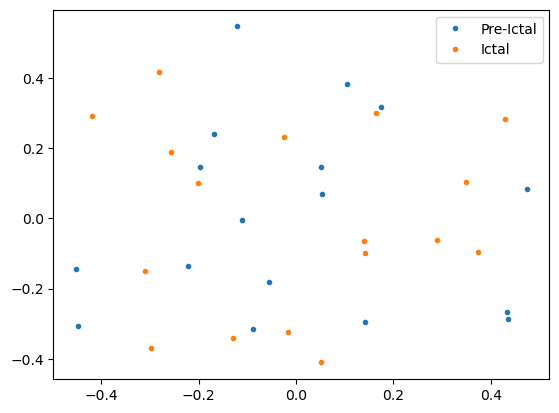

In [238]:
plt.figure()
plt.plot(x1,x2,'.', label = 'Pre-Ictal')
plt.plot(x3,x4, '.', label = 'Ictal')

plt.legend()
plt.show()

In [239]:
pca_features

array([[-0.16823729,  0.23995497],
       [-0.22270016, -0.13607748],
       [ 0.47412979,  0.08417055],
       [-0.19670533,  0.14534438],
       [-0.45218311, -0.14503644],
       [-0.1119398 , -0.00451183],
       [-0.44779421, -0.30560889],
       [ 0.05212468,  0.06931312],
       [-0.05648457, -0.18031628],
       [ 0.17437302,  0.31672373],
       [ 0.43255506, -0.26546904],
       [-0.08758105, -0.31404941],
       [ 0.05176553,  0.14613461],
       [-0.12199587,  0.54715486],
       [ 0.14126406, -0.29516033],
       [ 0.10372229,  0.38395883],
       [ 0.43568695, -0.28652535]])

In [241]:
df = pd.DataFrame({'Feature 1':x1, 'Feature 2':x2})
df['Interval'] = 'Preictal'

df_2 = pd.DataFrame({'Feature 1':x3, 'Feature 2':x4})
df_2['Interval'] = 'Ictal'
frames = [df, df_2]
rdf = pd.concat(frames)
rdf

,Feature 1,Feature 2,Interval
0,-0.168237,0.239955,Preictal
1,-0.222700,-0.136077,Preictal
2,0.474130,0.084171,Preictal
3,-0.196705,0.145344,Preictal
4,-0.452183,-0.145036,Preictal
5,-0.111940,-0.004512,Preictal
6,-0.447794,-0.305609,Preictal
7,0.052125,0.069313,Preictal
8,-0.056485,-0.180316,Preictal
9,0.174373,0.316724,Preictal
